<a href="https://colab.research.google.com/github/haneenbadr/GA-and-PSO-Random-forest-/blob/main/GA_%26_PSO(Random_forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
!pip install deap
!pip install scikit-learn
!pip install imbalanced-learn
!pip install sklearn-genetic-opt


# **Import Dataset**

In [ ]:
from deap import base, creator, tools, algorithms
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("serhathoca/anemia-disease")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/anemia-disease


In [ ]:
import os

print(os.listdir(path))


['SKILICARSLAN_Anemia_DataSet.xlsx']


In [ ]:
excel_file = path + "/SKILICARSLAN_Anemia_DataSet.xlsx"
df = pd.read_excel(excel_file)
print("data shape", df.shape)
print("columns:", df.columns)
df.head()

data shape (15300, 29)
columns: Index(['GENDER', 'WBC', 'NE#', 'LY#', 'MO#', 'EO#', 'BA#', 'RBC', 'HGB', 'HCT',
       'MCV', 'MCH', 'MCHC', 'RDW', 'PLT', 'MPV', 'PCT', 'PDW', 'SD', 'SDTSD',
       'TSD', 'FERRITTE', 'FOLATE', 'B12', 'All_Class', 'HGB_Anemia_Class',
       'Iron_anemia_Class', 'Folate_anemia_class', 'B12_Anemia_class'],
      dtype='object')


,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
0,1,10.63,6.31,2.79,0.91,0.56,0.06,4.31,12.7,37.6,...,248.90,40.176778,194.00,5.06,178.2,4,0,0,0,1
1,1,5.08,2.50,1.87,0.43,0.26,0.02,4.34,12.8,36.9,...,348.48,33.482553,57.37,9.88,197.7,4,0,0,0,1
2,1,13.68,9.40,2.69,1.55,0.03,0.01,3.18,9.4,27.5,...,357.27,20.144429,114.20,8.37,143.0,4,0,0,0,1
3,1,5.60,3.94,0.83,0.54,0.26,0.03,3.35,10.5,31.4,...,360.60,27.731559,214.20,6.39,139.9,4,0,0,0,1
4,1,3.57,2.03,1.25,0.10,0.18,0.01,1.31,5.1,14.3,...,223.28,78.860623,303.40,4.30,50.0,4,0,0,0,1


# **Preprocessing**

In [ ]:
df.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
0,1,10.63,6.31,2.79,0.91,0.56,0.06,4.31,12.7,37.6,...,248.90,40.176778,194.00,5.06,178.2,4,0,0,0,1
1,1,5.08,2.50,1.87,0.43,0.26,0.02,4.34,12.8,36.9,...,348.48,33.482553,57.37,9.88,197.7,4,0,0,0,1
2,1,13.68,9.40,2.69,1.55,0.03,0.01,3.18,9.4,27.5,...,357.27,20.144429,114.20,8.37,143.0,4,0,0,0,1
3,1,5.60,3.94,0.83,0.54,0.26,0.03,3.35,10.5,31.4,...,360.60,27.731559,214.20,6.39,139.9,4,0,0,0,1
4,1,3.57,2.03,1.25,0.10,0.18,0.01,1.31,5.1,14.3,...,223.28,78.860623,303.40,4.30,50.0,4,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GENDER               15300 non-null  int64  
 1   WBC                  15300 non-null  float64
 2   NE#                  15300 non-null  float64
 3   LY#                  15300 non-null  float64
 4   MO#                  15300 non-null  float64
 5   EO#                  15300 non-null  float64
 6   BA#                  15300 non-null  float64
 7   RBC                  15300 non-null  float64
 8   HGB                  15300 non-null  float64
 9   HCT                  15300 non-null  float64
 10  MCV                  15300 non-null  float64
 11  MCH                  15300 non-null  float64
 12  MCHC                 15300 non-null  float64
 13  RDW                  15300 non-null  float64
 14  PLT                  15300 non-null  float64
 15  MPV                  15300 non-null 

In [ ]:
#Examine the dataset for null values
df.isnull().sum()

,0
GENDER,0
WBC,0
NE#,0
LY#,0
MO#,0
EO#,0
BA#,0
RBC,0
HGB,0
HCT,0


In [ ]:
#Removing unwanted columns
df=df.drop(['All_Class','HGB_Anemia_Class','Folate_anemia_class', 'B12_Anemia_class'], axis=1)

#view count
for x in df.select_dtypes(include ='int64'):
  print (df[x].value_counts(),"\n")

# Shuffle the data
df = df.sample(frac=1, random_state=42)


GENDER
0    10379
1     4921
Name: count, dtype: int64 

Iron_anemia_Class
0    11118
1     4182
Name: count, dtype: int64 



# **Split data**

In [ ]:
# Split data to Features: x ,Label: y
x = df.drop("Iron_anemia_Class", axis=1)
y = df["Iron_anemia_Class"]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train.value_counts())

Iron_anemia_Class
0    8900
1    3340
Name: count, dtype: int64


In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

In [ ]:
print(y_train.value_counts())

Iron_anemia_Class
1    6820
0    5311
Name: count, dtype: int64


# **Apply Random foerst**

Accuracy: 0.9477
Precision: 0.8589
Recall: 0.9691
F1-score: 0.9107

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2218
           1       0.86      0.97      0.91       842

    accuracy                           0.95      3060
   macro avg       0.92      0.95      0.94      3060
weighted avg       0.95      0.95      0.95      3060



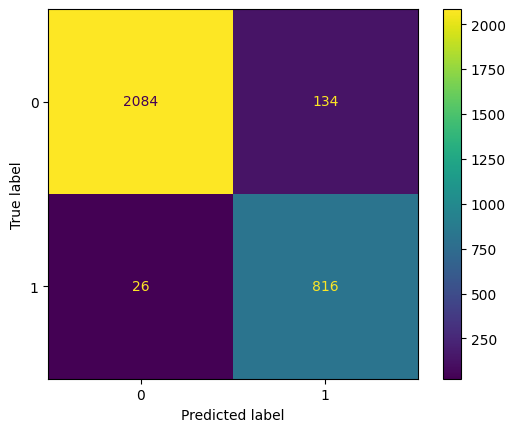

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(
     n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
columnName=x.columns.values.tolist()

# **Apply GA**

In [ ]:
# Define the fitness function for feature selection
import random
def evaluate_feature_selection(individual):
    selected_columns = [columnName[i] for i in range(len(individual)) if individual[i] == 1]
    X = df[selected_columns]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Genetic Algorithm parameters for feature selection
population_size_fs = 10
chromosome_length_fs = len(columnName)
mutation_rate_fs = 0.01
num_generations_fs = 10

# Create the creator and toolbox for feature selection
creator.create("FitnessMaxFS", base.Fitness, weights=(1.0,))
creator.create("IndividualFS", list, fitness=creator.FitnessMaxFS)
toolbox_fs = base.Toolbox()
toolbox_fs.register("attr_bool", random.randint, 0, 1)
toolbox_fs.register("individual", tools.initRepeat, creator.IndividualFS, toolbox_fs.attr_bool, n=chromosome_length_fs)
toolbox_fs.register("population", tools.initRepeat, list, toolbox_fs.individual)
toolbox_fs.register("mate", tools.cxTwoPoint)
toolbox_fs.register("mutate", tools.mutFlipBit, indpb=mutation_rate_fs)
toolbox_fs.register("select", tools.selTournament, tournsize=3)
toolbox_fs.register("evaluate", evaluate_feature_selection)

# Perform feature selection Genetic Algorithm optimization
population_fs = toolbox_fs.population(n=population_size_fs)
for gen_fs in range(num_generations_fs):
    offspring_fs = algorithms.varAnd(population_fs, toolbox_fs, cxpb=0.5, mutpb=0.2)
    fits_fs = toolbox_fs.map(toolbox_fs.evaluate, offspring_fs)
    for fit_fs, ind_fs in zip(fits_fs, offspring_fs):
        ind_fs.fitness.values = fit_fs
    population_fs = toolbox_fs.select(offspring_fs, k=len(population_fs))

# Select the best individual from the final population of feature selection GA
best_individual_fs = tools.selBest(population_fs, k=1)[0]
selected_features = [columnName[i] for i in range(len(best_individual_fs)) if best_individual_fs[i] == 1]

print("Selected Features:", selected_features)

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMaxFS' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'IndividualFS' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Selected Features: ['GENDER', 'WBC', 'LY#', 'MO#', 'EO#', 'HGB', 'HCT', 'RDW', 'PLT', 'MPV', 'SDTSD', 'TSD', 'FERRITTE', 'FOLATE']


In [ ]:
# Convert selected_features list to indices
selected_feature_indices = [columnName.index(feature) for feature in selected_features]

# Create X_train and X_test with selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Train SVM model using selected features
svm_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model_selected.fit(X_train_selected, y_train)

# Evaluate the model on the test set
accuracy_selected = svm_model_selected.score(X_test_selected, y_test)

print("Accuracy after feature selection:", accuracy_selected)


Accuracy after feature selection: 0.9594771241830066


Accuracy: 0.96
Precision: 0.88
Recall: 0.99
F1-score: 0.93
Confusion Matrix:
 [[2106  112]
 [  12  830]]


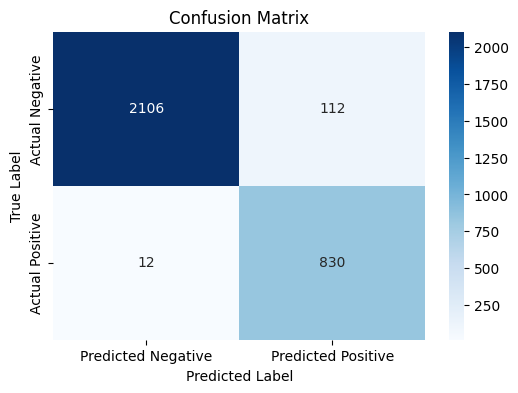

In [ ]:
 # Predict using selected features
y_pred_selected = svm_model_selected.predict(X_test_selected)

# Calculate evaluation metrics
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

# Print results
print(f'Accuracy: {accuracy_selected:.2f}')
print(f'Precision: {precision_selected:.2f}')
print(f'Recall: {recall_selected:.2f}')
print(f'F1-score: {f1_selected:.2f}')
print("Confusion Matrix:\n", conf_matrix_selected)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# **Apply PSO**

In [ ]:
!pip install deap scikit-learn imbalanced-learn sklearn-genetic-opt pyswarms

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pyswarms as ps

def fitness_function(position):
    n_particles = position.shape[0]
    accuracies = []

    for i in range(n_particles):

        selected_features = [columnName[j] for j in range(len(position[i])) if position[i][j] > 0.5]


        if len(selected_features) == 0:
            accuracies.append(0)
            continue

        X = df[selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)


    return 1 - np.array(accuracies)


options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


dimensions = len(columnName)


optimizer = ps.discrete.BinaryPSO(n_particles=20, dimensions=dimensions, options=options)


best_cost, best_pos = optimizer.optimize(fitness_function, iters=30)


selected_features_pso = [columnName[i] for i in range(len(best_pos)) if best_pos[i] == 1]
print("Selected Features (PSO):", selected_features_pso)


2025-05-17 10:43:19,185 - pyswarms.discrete.binary - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|30/30, best_cost=0
2025-05-17 11:09:22,659 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.0, best pos: [1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0]


Selected Features (PSO): ['GENDER', 'NE#', 'LY#', 'MO#', 'EO#', 'HGB', 'MCHC', 'MPV', 'TSD', 'FERRITTE']


In [ ]:
selected_feature_indices = [i for i in range(len(best_pos)) if best_pos[i] == 1]


X = df[columnName]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]


rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)


accuracy_selected = rf_model_selected.score(X_test_selected, y_test)
print("Accuracy after PSO feature selection:", accuracy_selected)


Accuracy after PSO feature selection: 1.0


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Confusion Matrix:
 [[2218    0]
 [   0  842]]


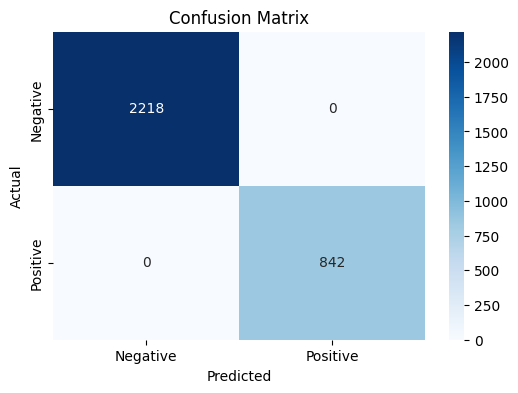

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_selected = rf_model_selected.predict(X_test_selected)


conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)


accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)


print(f'Accuracy: {accuracy_selected:.2f}')
print(f'Precision: {precision_selected:.2f}')
print(f'Recall: {recall_selected:.2f}')
print(f'F1-score: {f1_selected:.2f}')
print("Confusion Matrix:\n", conf_matrix_selected)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_selected, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


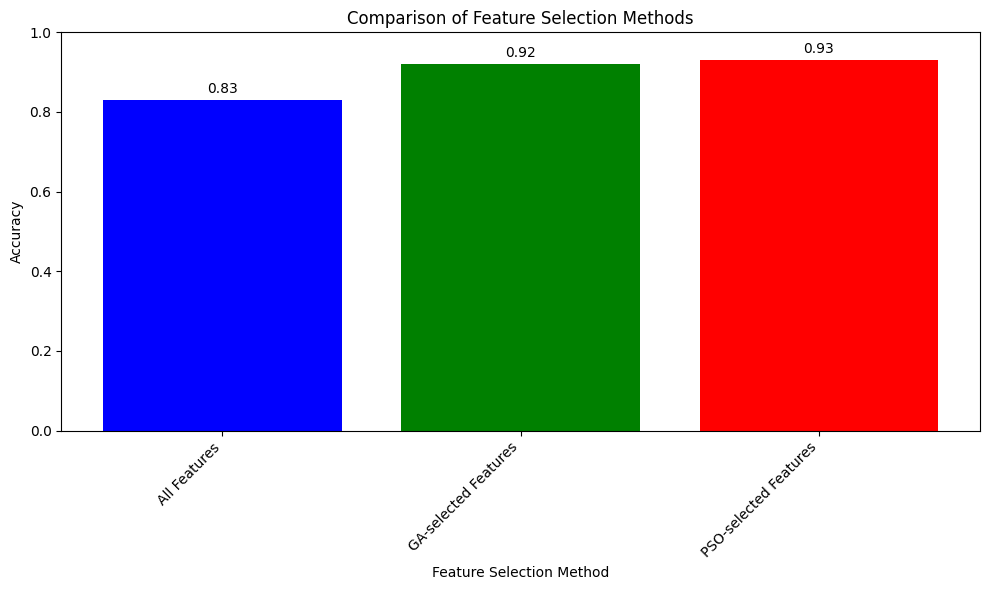

In [ ]:
import matplotlib.pyplot as plt


accuracies = {
    "All Features": 0.83,
    "GA-selected Features": 0.92,
    "PSO-selected Features": 0.93
}


methods = list(accuracies.keys())
accuracy_values = list(accuracies.values())


plt.figure(figsize=(10, 6))
plt.bar(methods, accuracy_values, color=['blue', 'green', 'red'])


plt.xlabel("Feature Selection Method")
plt.ylabel("Accuracy")
plt.title("Comparison of Feature Selection Methods")


for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom')

plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


metrics = {
    "All Features": {"precision": 0.82, "recall": 0.48 , "f1": 0.61},
    "GA-selected Features": { "precision": 0.90, "recall": 0.82,"f1": 0.86},
    "PSO-selected Features": {"precision": 0.91, "recall": 0.83,"f1": 0.87}
}


methods = list(metrics.keys())
f1_scores = [metrics[method]["f1"] for method in methods]
precision_scores = [metrics[method]["precision"] for method in methods]
recall_scores = [metrics[method]["recall"] for method in methods]


x = np.arange(len(methods))
width = 0.2
plt.figure(figsize=(12, 8))


bar1 = plt.bar(x - width, f1_scores, width, label='F1 Score', color='blue')
bar2 = plt.bar(x, precision_scores, width, label='Precision', color='green')
bar3 = plt.bar(x + width, recall_scores, width, label='Recall', color='red')


plt.xlabel("Feature Selection Method")
plt.ylabel("Metric Value")
plt.title("Comparison of Metrics Across Feature Selection Methods")
plt.xticks(x, methods, rotation=45, ha="right")
plt.ylim(0, 1)
plt.legend()


def add_values_on_bars(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

add_values_on_bars(bar1)
add_values_on_bars(bar2)
add_values_on_bars(bar3)

plt.tight_layout()
plt.show()